## Linear Regression and Train/Test Split challenges
Ideally, try these with your own data! (Alternatively, there is the 2013_movies.csv data set.)

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Challenge 1
Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [45]:
movies = pd.read_csv("2013_movies.csv")
y = movies["DomesticTotalGross"]
X = pd.DataFrame()
X["constant"] = [1]*100
print("movies size: ", movies.shape)

movies size:  (100, 7)


In [47]:
model = sm.OLS(y, X)
fitted = model.fit()
fitted.summary()

/Users/kelvin/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Mon, 14 Oct 2019   Prob (F-statistic):                nan
Time:                        07:32:06   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    1.006e+08   8.74e+06     11.510      0.000    8.33e+07    1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#Parameter of 'constant' variable
fitted.params[0]

100596875.22000001

Text(0.5, 0, 'Predicted')

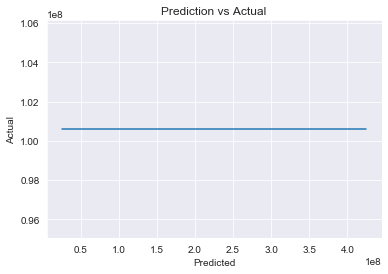

In [50]:
predicted = fitted.predict(X)
predicted
plt.plot(y, predicted)
plt.title('Prediction vs Actual')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [51]:
residuals = y-predicted

(array([47., 21., 15.,  3.,  3.,  4.,  3.,  0.,  1.,  3.]),
 array([-7.50286242e+07, -3.51186446e+07,  4.79133498e+06,  4.47013146e+07,
         8.46112942e+07,  1.24521274e+08,  1.64431253e+08,  2.04341233e+08,
         2.44251213e+08,  2.84161192e+08,  3.24071172e+08]),
 <a list of 10 Patch objects>)

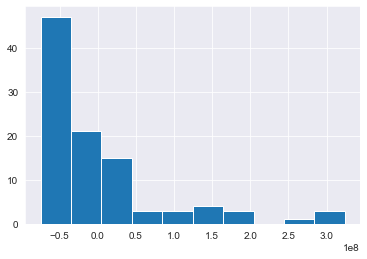

In [54]:
plt.hist(residuals, bins=10)

Most of the residuals (45%) are 0 as the values are close to the mean of the outcome y.

## Challenge 2
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [56]:
movies.head(2)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00


In [57]:
X_2 = X.copy()
X_2['Budget'] = movies['Budget']

In [59]:
X_2.isna().any()

constant    False
Budget       True
dtype: bool

There are some null values on the 'Budget' variable

In [60]:
model = sm.OLS(y, X_2, missing='drop')
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.82
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           6.80e-08
Time:                        07:45:20   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3480.
Df Residuals:                      87   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant     4.44e+07   1.27e+07      3.504      0.001    1.92e+07    6.96e+07
Budget         0.7846      0.133      5.901      0.000       0.520       1.049
==============================================================================
Omnibus:                       39.749   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.441
Skew:                           1.587   Prob(JB):                     2.55e-22
Kurtosis:                       7.091   Cond. No.                     1.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
predicted = fitted.predict(X_2)

Text(0, 0.5, 'Predicted Domestic Gross Total')

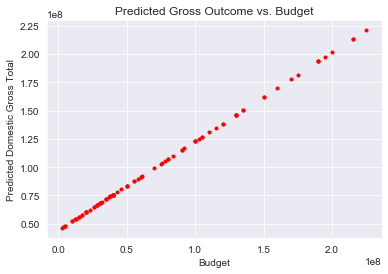

In [62]:
plt.plot(X_2['Budget'], predicted, 'r.')
plt.title('Predicted Gross Outcome vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Predicted Domestic Gross Total')

Text(0, 0.5, 'Residual')

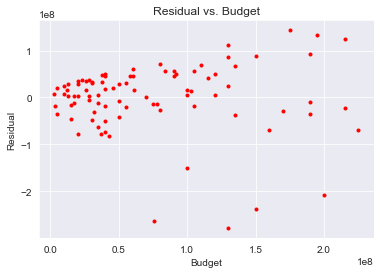

In [63]:
residual = predicted - y
plt.plot(X_2['Budget'], residual, 'r.')
plt.title('Residual vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Residual')

## Challenge 3
Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [64]:
movies.head(1)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00


In [68]:
X_3 = X.copy()
dummies = pd.get_dummies(movies["Rating"])
X_3 = pd.concat([X_3, dummies], axis=1)
X_3.head(1)

,constant,G,PG,PG-13,R
0,1,0,0,1,0


In [69]:
model = sm.OLS(y, X_3)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     3.924
Date:                Mon, 14 Oct 2019   Prob (F-statistic):             0.0109
Time:                        07:52:10   Log-Likelihood:                -1964.2
No. Observations:                 100   AIC:                             3936.
Df Residuals:                      96   BIC:                             3947.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    1.162e+08   1.77e+07      6.568      0.000    8.11e+07    1.51e+08
G           1.523e+08   6.73e+07      2.265      0.026    1.88e+07    2.86e+08
PG          1.494e+07   2.44e+07      0.613      0.541   -3.34e+07    6.33e+07
PG-13      -4.744e+06   2.01e+07     -0.236      0.814   -4.46e+07    3.51e+07
R           -4.63e+07   2.07e+07     -2.241      0.027   -8.73e+07    -5.3e+06
==============================================================================
Omnibus:                       46.897   Durbin-Watson:                   0.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.261
Skew:                           1.826   Prob(JB):                     1.88e-24
Kurtosis:                       6.589   Cond. No.                     1.85e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.08e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

An average movie's domestic gross start $116,200,000. G and PG movies bring in more ticket gross, while PG13 and R bring less than average.

## Challenge 4
Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [70]:
X_4 = X_3.copy()
X_4['Budget'] = movies['Budget']
X_4['Runtime'] = movies['Runtime']
X_4.head(2)

,constant,G,PG,PG-13,R,Budget,Runtime
0,1,0,0,1,0,130000000.0,146
1,1,0,0,1,0,200000000.0,129


In [71]:
model = sm.OLS(y, X_4, missing='drop')
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     9.089
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           3.77e-06
Time:                        08:01:12   Log-Likelihood:                -1737.0
No. Observations:                  89   AIC:                             3484.
Df Residuals:                      84   BIC:                             3497.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant   -1.012e+07   4.05e+07     -0.250      0.803   -9.08e+07    7.05e+07
G             -0.0509      0.374     -0.136      0.892      -0.795       0.693
PG          1.438e+07   1.74e+07      0.826      0.411   -2.02e+07     4.9e+07
PG-13      -1.342e+07   1.98e+07     -0.677      0.500   -5.28e+07     2.6e+07
R          -1.109e+07   2.03e+07     -0.547      0.586   -5.14e+07    2.92e+07
Budget         0.7036      0.165      4.255      0.000       0.375       1.032
Runtime     6.083e+05   5.21e+05      1.168      0.246   -4.27e+05    1.64e+06
==============================================================================
Omnibus:                       36.883   Durbin-Watson:                   0.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.319
Skew:                           1.525   Prob(JB):                     1.33e-18
Kurtosis:                       6.591   Cond. No.                     6.98e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.66e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Challenge 5
Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_4, y, test_size=0.25, random_state=42)

In [74]:
model = sm.OLS(y_train, X_train, missing='drop')
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     8.663
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           1.33e-05
Time:                        08:06:28   Log-Likelihood:                -1283.2
No. Observations:                  66   AIC:                             2576.
Df Residuals:                      61   BIC:                             2587.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant   -5.602e+05   4.37e+07     -0.013      0.990    -8.8e+07    8.69e+07
G              0.0106      0.143      0.074      0.941      -0.275       0.296
PG          8.617e+06   1.84e+07      0.469      0.641   -2.81e+07    4.54e+07
PG-13      -9.269e+06   2.11e+07     -0.439      0.662   -5.15e+07    3.29e+07
R           9.217e+04   2.14e+07      0.004      0.997   -4.26e+07    4.28e+07
Budget         0.9767      0.200      4.892      0.000       0.577       1.376
Runtime     3.352e+05   5.51e+05      0.609      0.545   -7.66e+05    1.44e+06
==============================================================================
Omnibus:                       28.976   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.960
Skew:                           1.532   Prob(JB):                     1.92e-12
Kurtosis:                       6.200   Cond. No.                     6.84e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.86e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [75]:
predicted = fitted.predict(X_test)

Text(0, 0.5, 'Predicted y value')

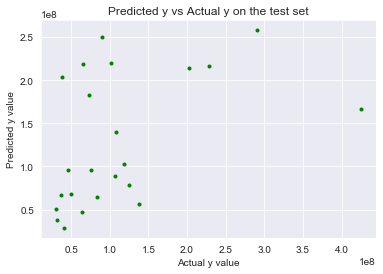

In [77]:
plt.plot(y_test, predicted, 'g.')
plt.title('Predicted y vs Actual y on the test set')
plt.xlabel('Actual y value')
plt.ylabel('Predicted y value')